<a href="https://colab.research.google.com/github/makaronaaa/DataSciencePython/blob/main/Forecast_Gas_Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [22]:
# Visualization
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 400)

sns.set(context='notebook', style='whitegrid', rc={"figure.figsize": (18,4)})

In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [24]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 18,4

In [25]:
rnd_seed=42
np.random.seed=rnd_seed
np.random.set_state=rnd_seed

Processing the Data

In [102]:
data = pd.read_csv("/content/sample_data/Electric & Gas Utilities.csv")
data.head()

,DATE,IPG2211A2N
0,1939-01-01,3.3336
1,1939-02-01,3.3591
2,1939-03-01,3.4354
3,1939-04-01,3.4609
4,1939-05-01,3.4609


In [103]:
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index(keys=['DATE'], drop=True, inplace=True)

In [104]:
data.columns = ['Energy_Production']
data.head()

,Energy_Production
DATE,
1939-01-01,3.3336
1939-02-01,3.3591
1939-03-01,3.4354
1939-04-01,3.4609
1939-05-01,3.4609


In [105]:
data.tail()

,Energy_Production
DATE,
2023-02-01,106.2586
2023-03-01,104.5988
2023-04-01,89.7748
2023-05-01,90.8153
2023-06-01,98.7222


In [106]:
data[pd.isnull(data['Energy_Production'])]

,Energy_Production
DATE,


Visualization Time Series:

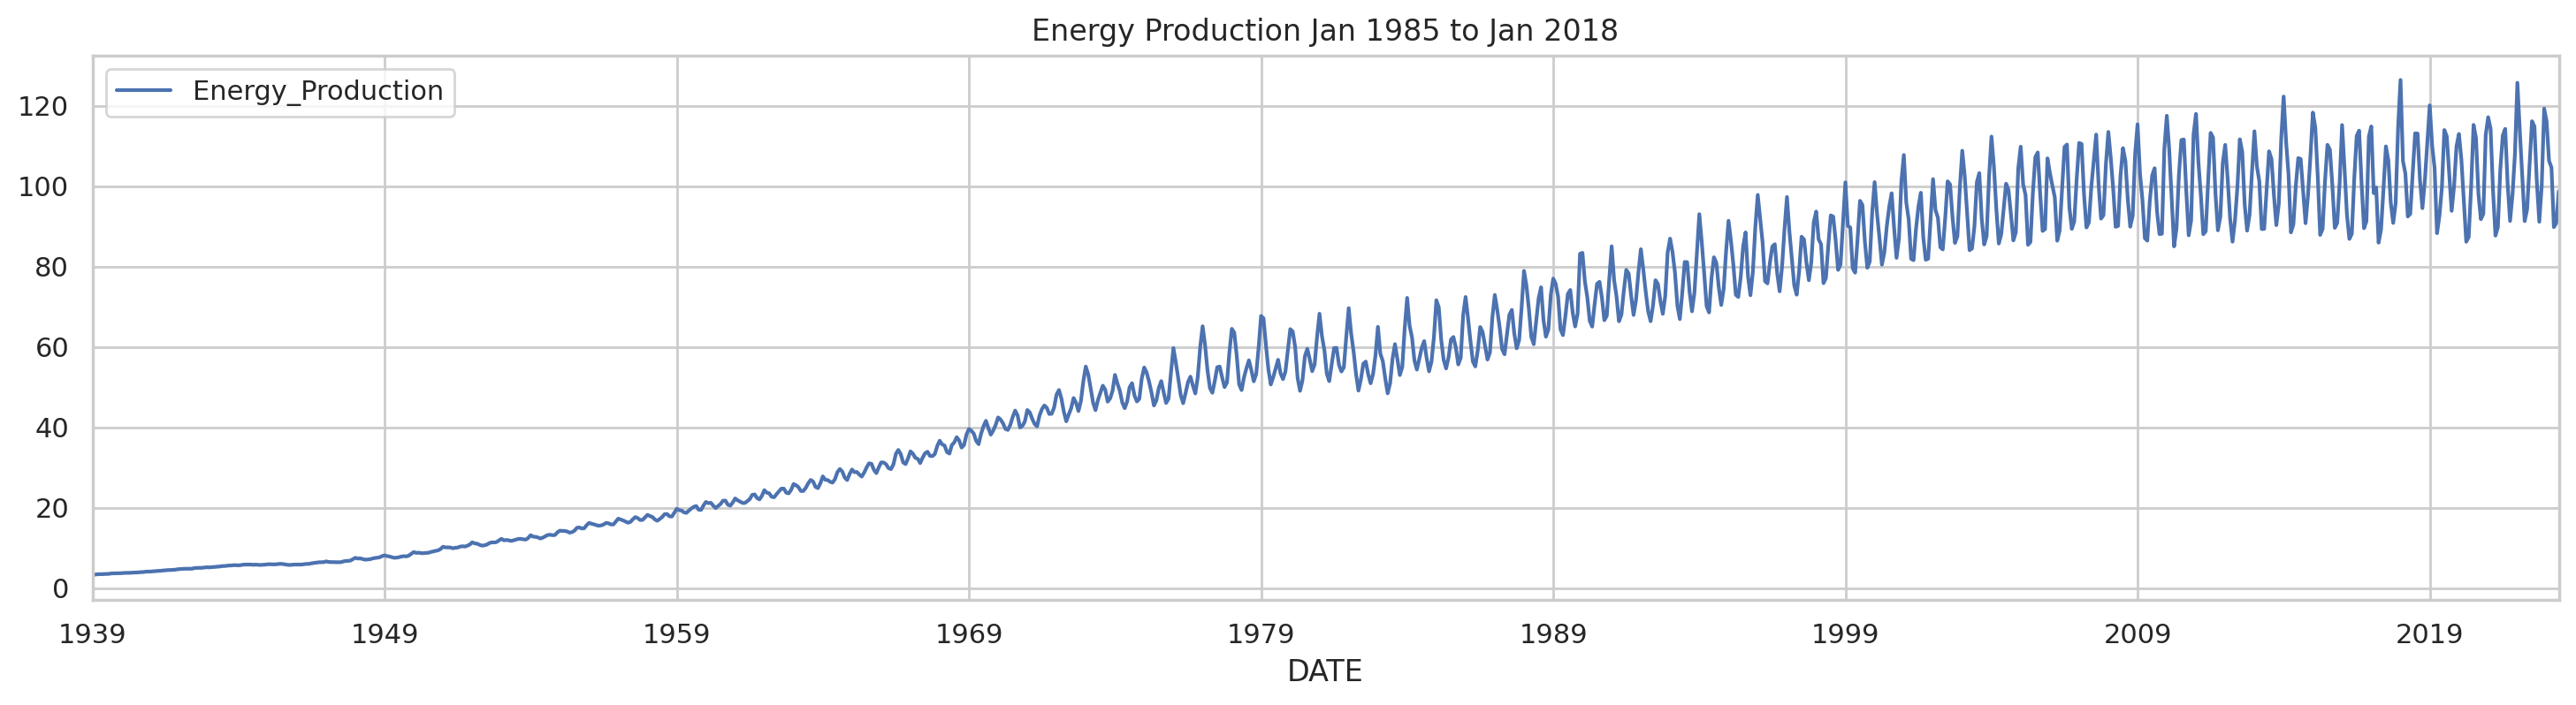

In [107]:
data.plot()
plt.title("Energy Production Jan 1985 to Jan 2018");

Decomposition:

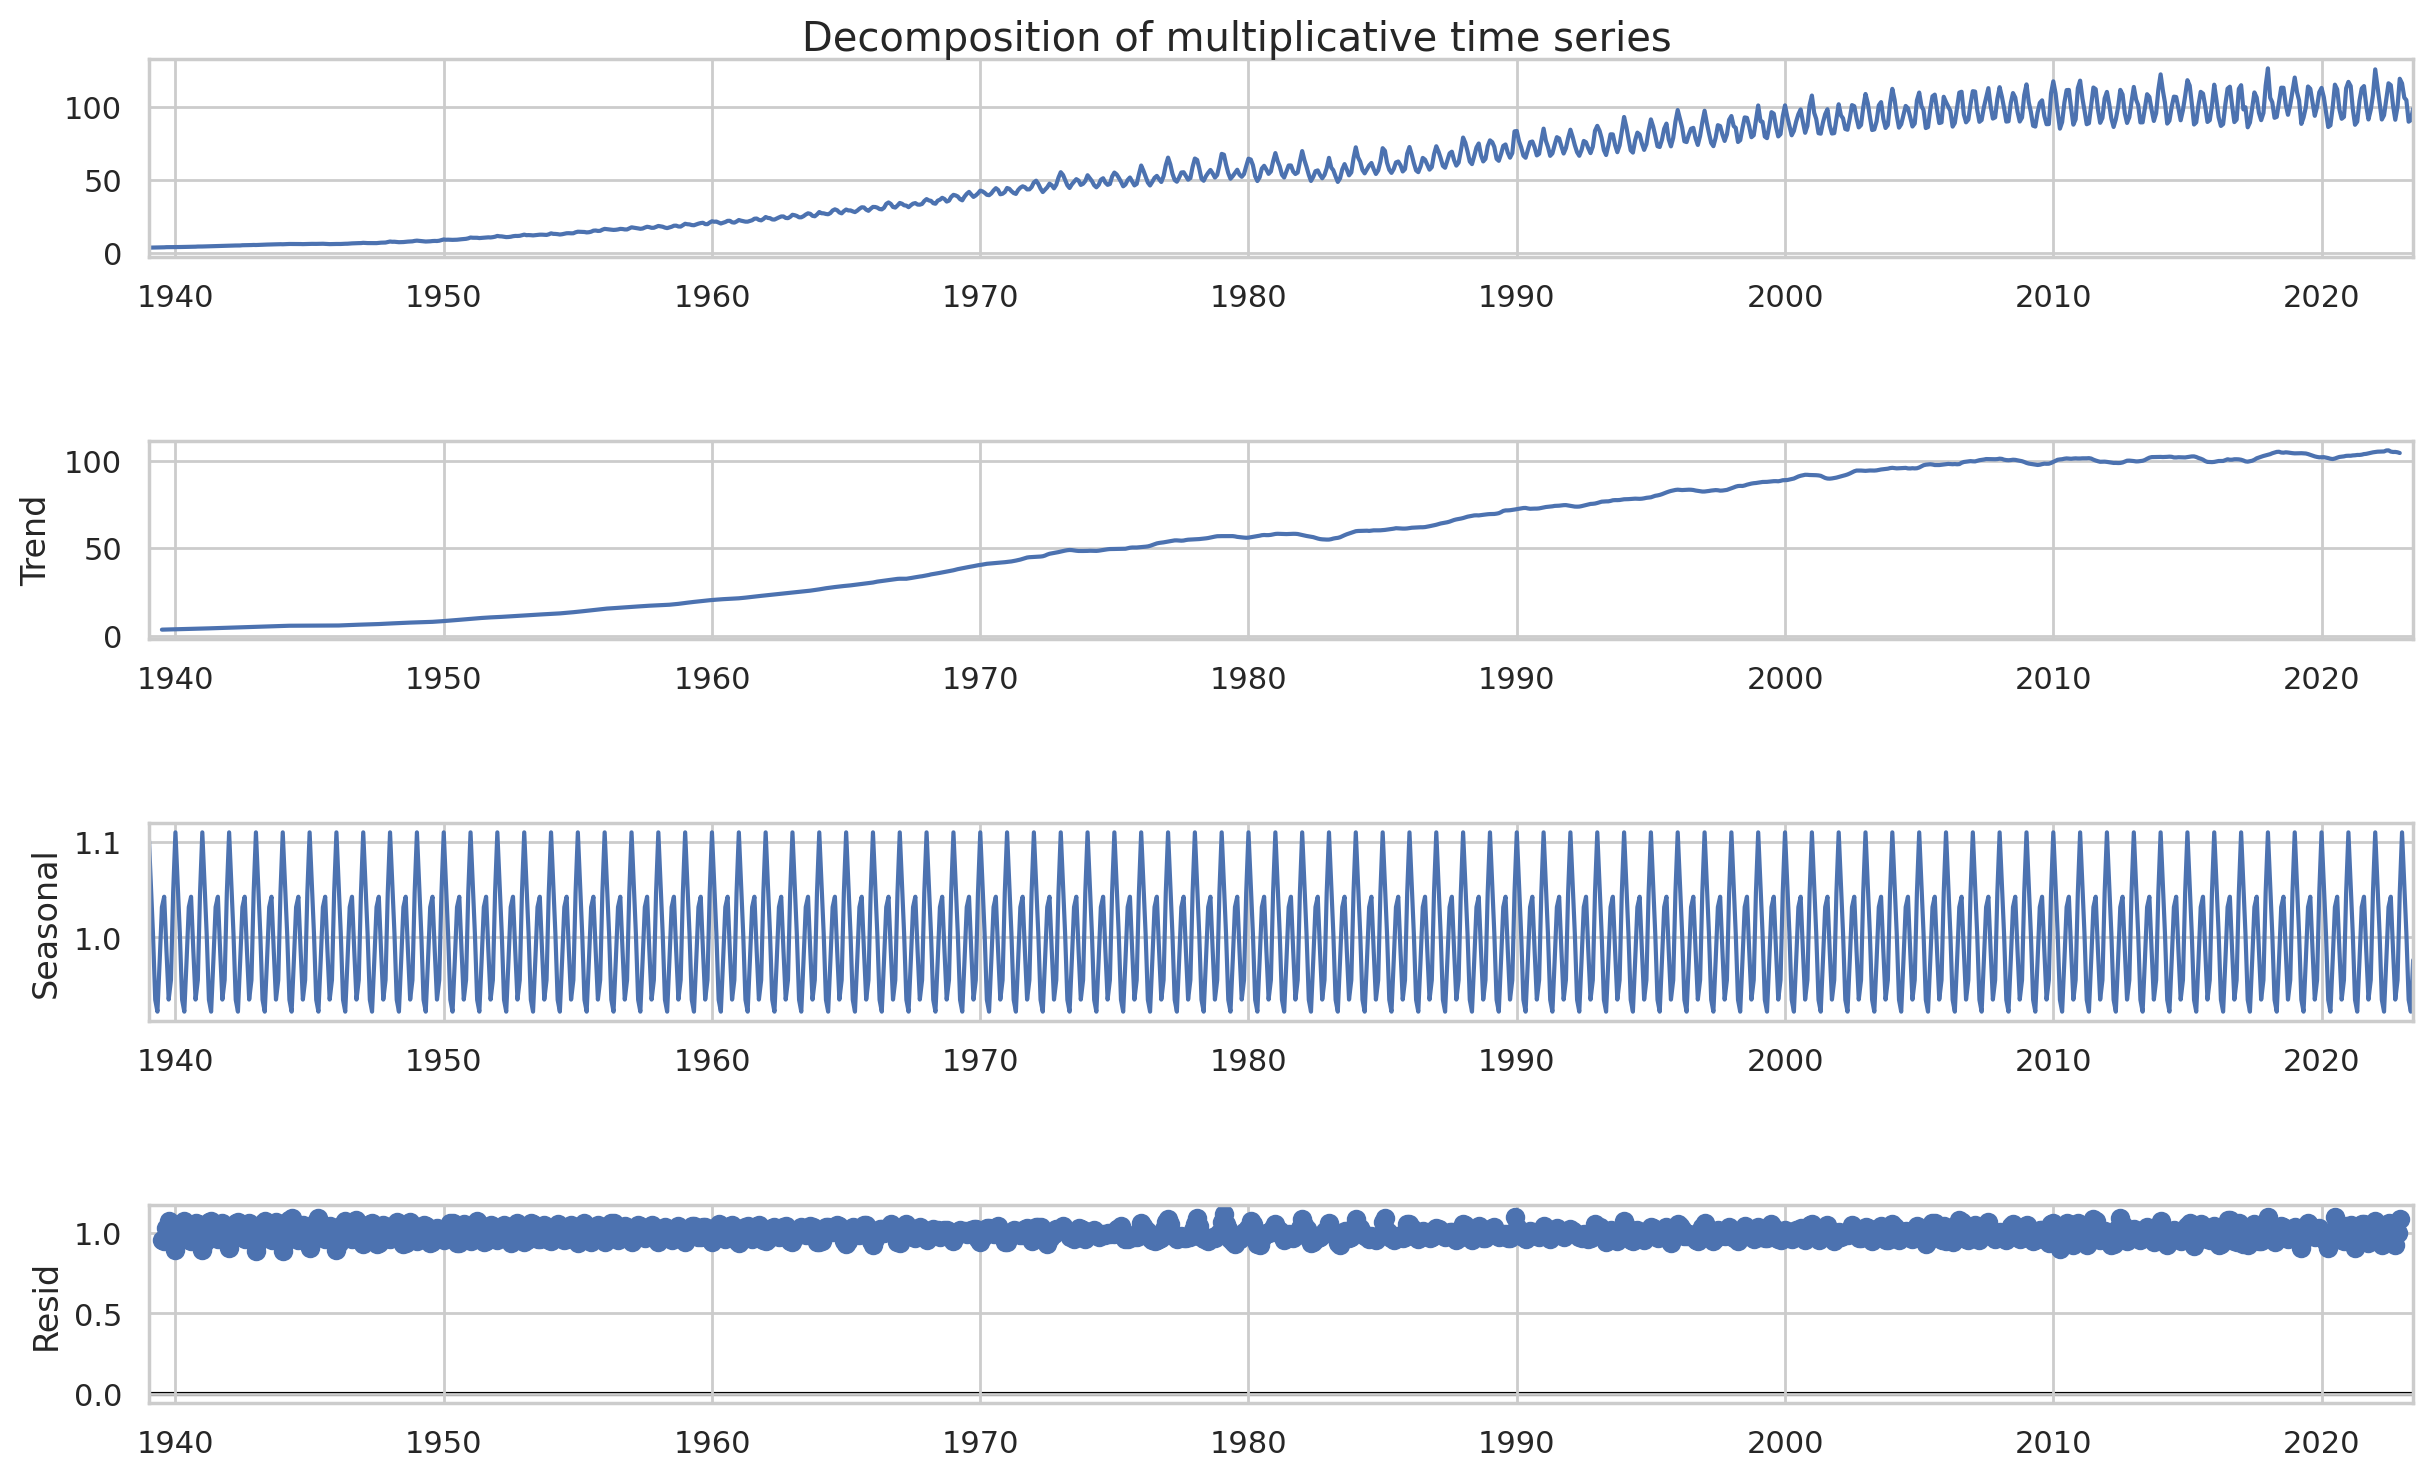

In [108]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data, model='multiplicative')
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series');

ARIMA:

In [109]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

p, d, q = 1, 1, 1
P, D, Q, m = 0, 1, 1, 12

stepwise_model = sm.tsa.statespace.SARIMAX(data, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12),
                                          enforce_stationarity=False, enforce_invertibility=False)
results = stepwise_model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                  Energy_Production   No. Observations:                 1014
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -2028.816
Date:                            Mon, 24 Jul 2023   AIC                           4065.632
Time:                                    17:14:48   BIC                           4085.210
Sample:                                01-01-1939   HQIC                          4073.078
                                     - 06-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4870      0.023     21.107      0.000       0.442       0.532
ma.L1         -0.9323      0.012   

In [110]:
print("AIC:", results.aic)

AIC: 4065.6316248681237


In [113]:
train = data.loc['1985-01-01':'2019-12-01']
train.tail()

,Energy_Production
DATE,
2019-08-01,112.3526
2019-09-01,103.1273
2019-10-01,93.8114
2019-11-01,99.9641
2019-12-01,109.9062


In [114]:
test = data.loc['2020-01-01':]
test.head()

,Energy_Production
DATE,
2020-01-01,112.9423
2020-02-01,106.6011
2020-03-01,96.5659
2020-04-01,86.1331
2020-05-01,87.2930


In [115]:
test.tail()

,Energy_Production
DATE,
2023-02-01,106.2586
2023-03-01,104.5988
2023-04-01,89.7748
2023-05-01,90.8153
2023-06-01,98.7222


Train the Model

In [116]:
len(train), len(test)

(420, 42)

In [117]:
stepwise_model.fit(train)

Evaluation:

In [162]:
test_predictions = results.predict(start=len(data), end=len(data) + 36)
# test_predictions = pd.DataFrame(test_predictions, index=test.index, columns=['Prediction'])
test_predictions


2023-07-01    112.222789
2023-08-01    112.515226
2023-09-01    100.527732
2023-10-01     92.266116
2023-11-01     98.240566
2023-12-01    113.355406
2024-01-01    119.595698
2024-02-01    109.988935
2024-03-01    102.468290
2024-04-01     90.016540
2024-05-01     91.988270
2024-06-01    102.475043
2024-07-01    114.191599
2024-08-01    113.615249
2024-09-01    101.204675
2024-10-01     92.737028
2024-11-01     98.611145
2024-12-01    113.677125
2025-01-01    119.893624
2025-02-01    110.275274
2025-03-01    102.748986
2025-04-01     90.294488
2025-05-01     92.264880
2025-06-01    102.751001
2025-07-01    114.467240
2025-08-01    113.890736
2025-09-01    101.480087
2025-10-01     93.012403
2025-11-01     98.886502
2025-12-01    113.952473
2026-01-01    120.168968
2026-02-01    110.550616
2026-03-01    103.024327
2026-04-01     90.569828
2026-05-01     92.540220
2026-06-01    103.026341
2026-07-01    114.742580
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
test_predictions_df = test_predictions.to_frame(name='Prediction')
print(test_predictions_df)

In [138]:
test.head()

,Energy_Production
DATE,
2020-01-01,112.9423
2020-02-01,106.6011
2020-03-01,96.5659
2020-04-01,86.1331
2020-05-01,87.2930


In [65]:
test_predictions_df.head()

2023-07-01    112.222789
2023-08-01    112.515226
2023-09-01    100.527732
2023-10-01     92.266116
2023-11-01     98.240566
Freq: MS, Name: predicted_mean, dtype: float64

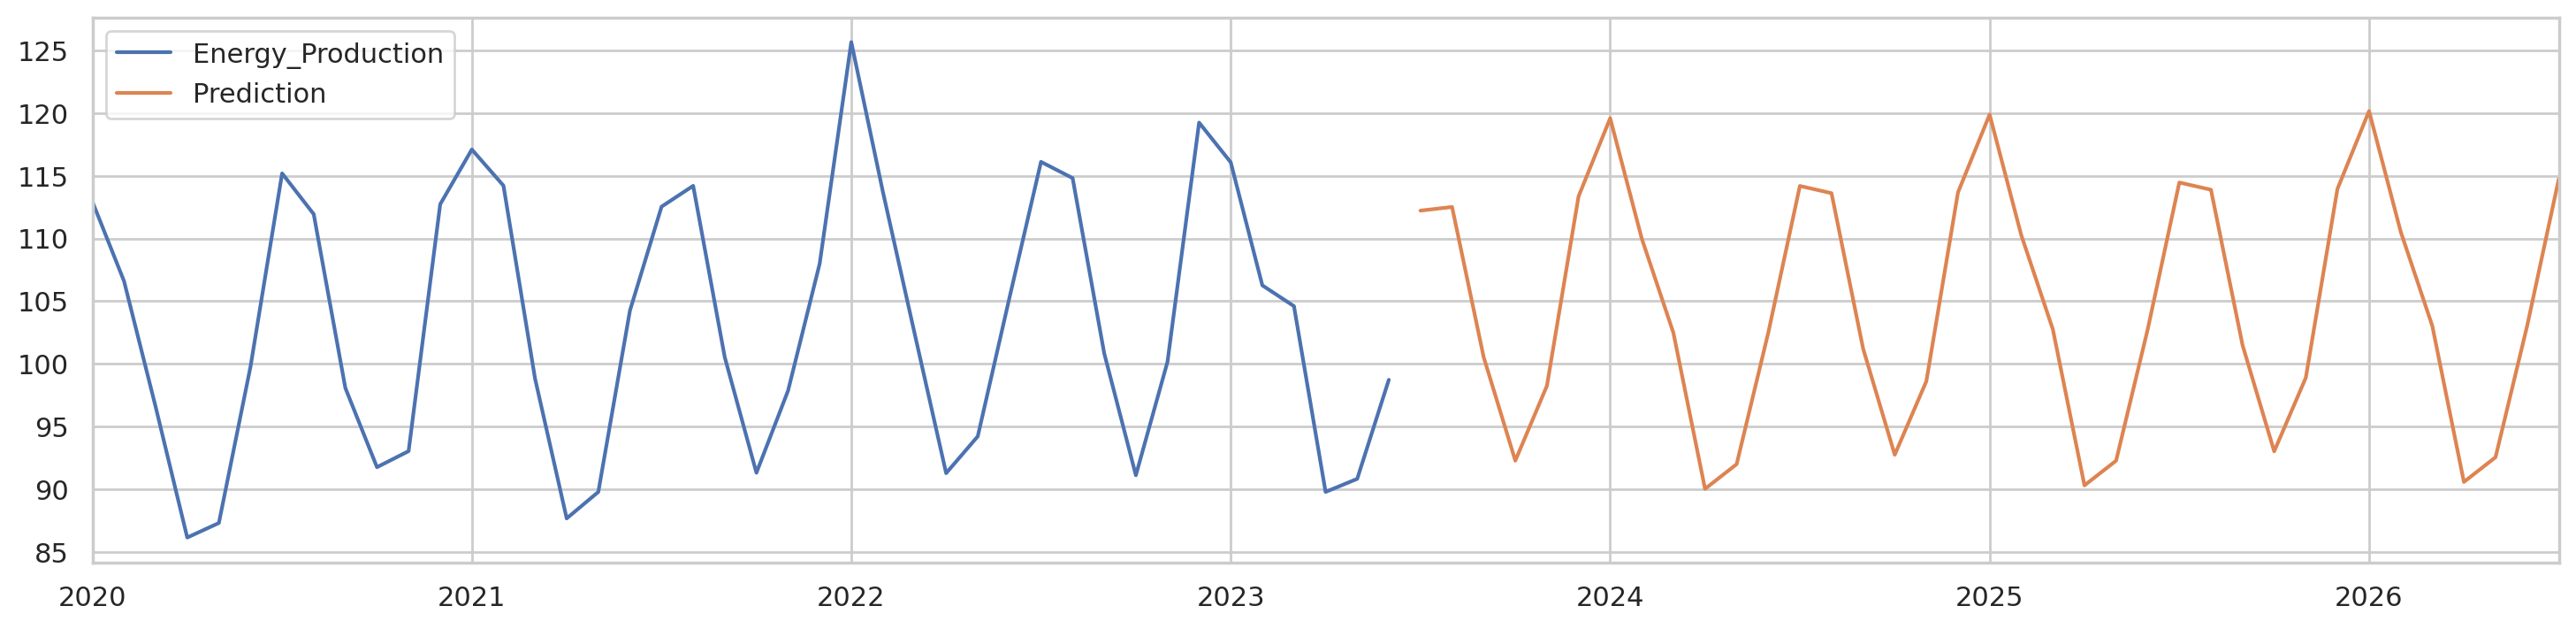

In [139]:
pd.concat([test, test_predictions_df], axis=1).plot();

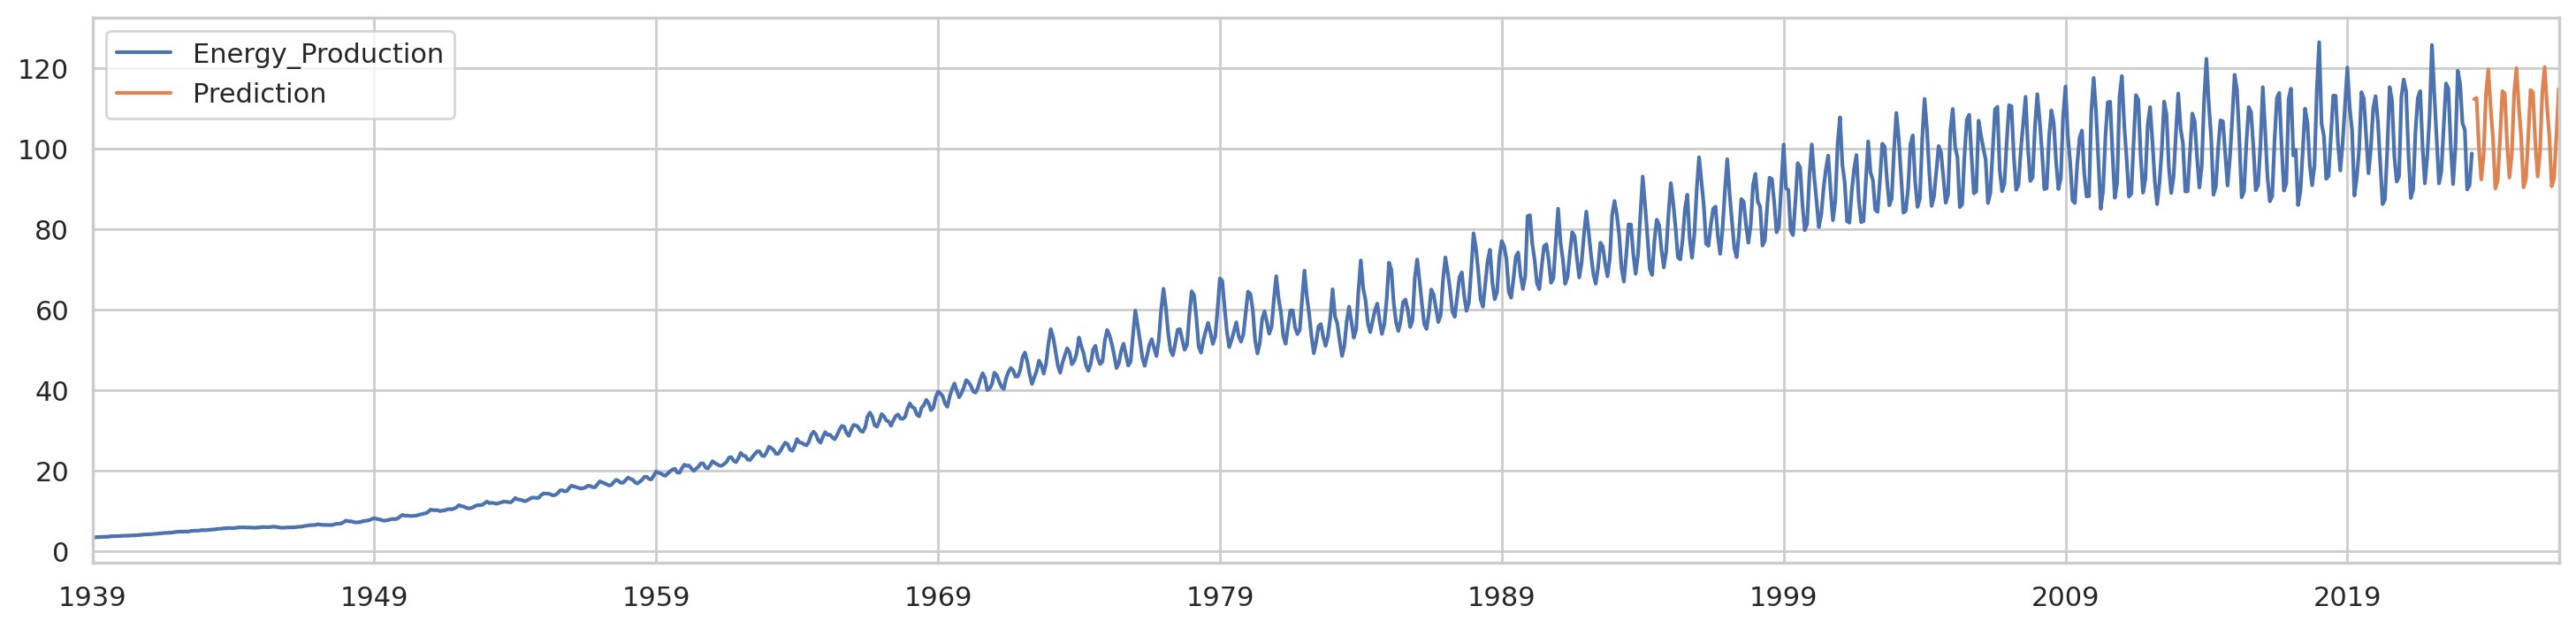

In [140]:
pd.concat([data, test_predictions_df], axis=1).plot();

Refit the model to our entire data set & forecast

In [147]:
future_forecast = stepwise_model.fit(data).predict(n_periods=36)
future_forecast

1939-01-01      0.000000
1939-02-01      2.556397
1939-03-01      3.582623
1939-04-01      3.336849
1939-05-01      3.481211
                 ...    
2023-02-01    112.359029
2023-03-01     91.137501
2023-04-01     92.219653
2023-05-01     94.756743
2023-06-01    100.942258
Freq: MS, Name: predicted_mean, Length: 1014, dtype: float64

In [142]:
data.index

DatetimeIndex(['1939-01-01', '1939-02-01', '1939-03-01', '1939-04-01',
               '1939-05-01', '1939-06-01', '1939-07-01', '1939-08-01',
               '1939-09-01', '1939-10-01',
               ...
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01'],
              dtype='datetime64[ns]', name='DATE', length=1014, freq=None)

In [143]:
future_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=36, freq='MS')
future_index

DatetimeIndex(['2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01', '2024-01-01', '2024-02-01',
               '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01',
               '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01',
               '2024-11-01', '2024-12-01', '2025-01-01', '2025-02-01',
               '2025-03-01', '2025-04-01', '2025-05-01', '2025-06-01',
               '2025-07-01', '2025-08-01', '2025-09-01', '2025-10-01',
               '2025-11-01', '2025-12-01', '2026-01-01', '2026-02-01',
               '2026-03-01', '2026-04-01', '2026-05-01', '2026-06-01'],
              dtype='datetime64[ns]', freq='MS')

In [144]:
future_forecast = pd.DataFrame(future_forecast, index=future_index, columns=['Prediction'])


In [146]:
pd.concat([data, future_forecast], axis=1).tail()


,Energy_Production,Prediction
2026-02-01,NaN,NaN
2026-03-01,NaN,NaN
2026-04-01,NaN,NaN
2026-05-01,NaN,NaN
2026-06-01,NaN,NaN


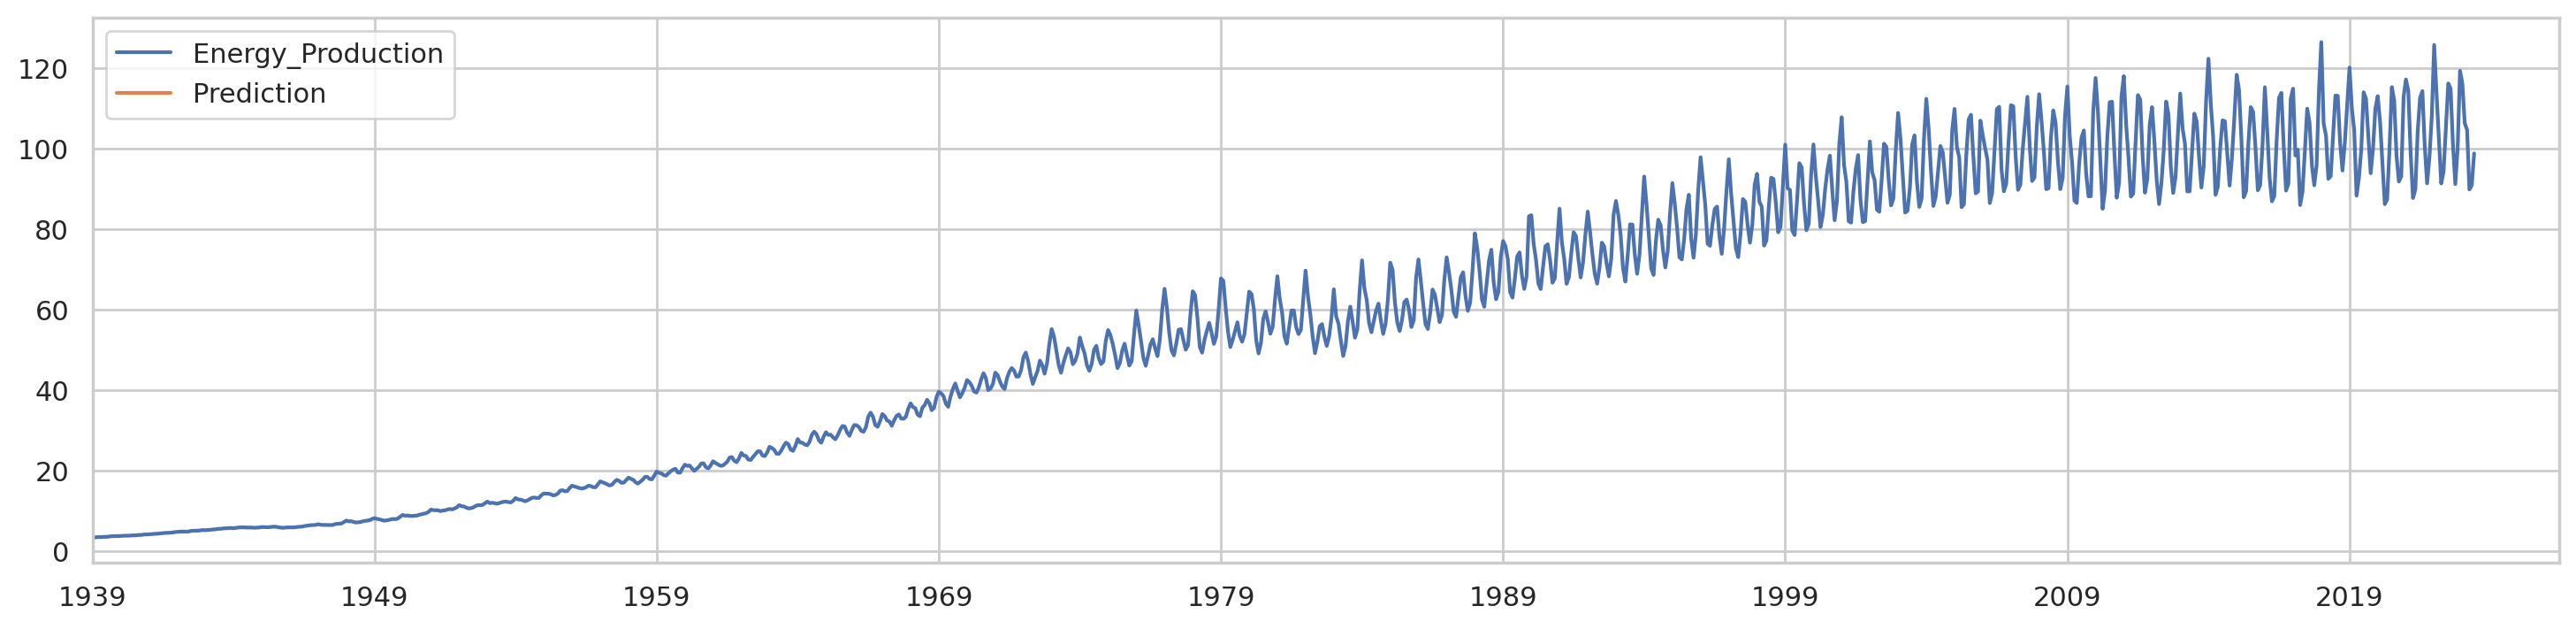

In [75]:
pd.concat([data, future_forecast], axis=1).plot();
